OpenCV, or Open Source Computer Vision Library, is an open-source computer vision and machine learning software library. It was initially developed by Intel and later maintained by Willow Garage and Itseez (which was later acquired by Intel). OpenCV is written in C++ and provides a comprehensive set of tools, functions, and algorithms for real-time computer vision.

Key features of OpenCV include:

Image Processing: OpenCV provides a wide range of functions for image processing tasks such as filtering, edge detection, image transformation, and histogram manipulation.

Computer Vision Algorithms: It includes a variety of computer vision algorithms, including feature detection, object recognition, optical flow, and camera calibration.

Machine Learning: OpenCV integrates machine learning tools and algorithms, making it useful for tasks like object detection, facial recognition, and machine learning model training.

Camera Calibration: OpenCV supports camera calibration, which is essential for accurate computer vision applications, especially in robotics and augmented reality.

Video Analysis: It offers tools for video analysis, including video capturing, processing, and feature extraction.

Cross-Platform: OpenCV is cross-platform and supports various operating systems, including Windows, Linux, and macOS.

Open Source: Being open source, OpenCV allows developers to access and modify the source code, contributing to the community and adapting it for specific needs.

Developers commonly use OpenCV with programming languages like Python, C++, and Java. It has become a standard library in computer vision and is widely used in various applications, including robotics, medical image analysis, autonomous vehicles, and more. The library continues to evolve, with regular updates and contributions from the open-source community.

Install opencv

In [ ]:
!pip install opencv-python


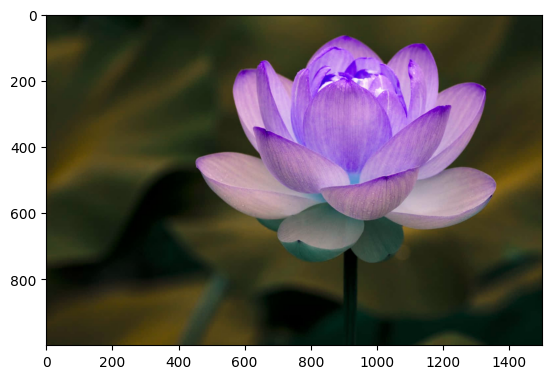

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

# Task 1: Reading and Displaying Images

# Read an image
img = cv2.imread('your_image.jpg')

# Display the image
imshow(img)



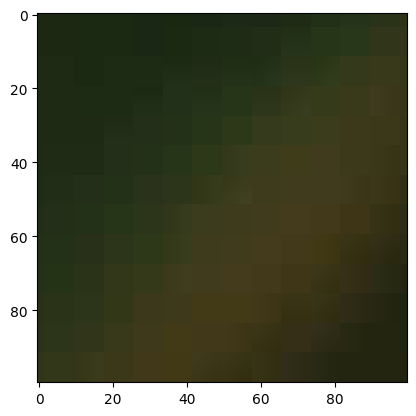

In [ ]:

# Task 2: Displaying a Part of the 3-D Array Representing an Image

# Display only the region of interest (ROI)
roi = img[100:200, 150:250]
imshow(roi)



Pixel Value at (50, 50): [27 37 20]


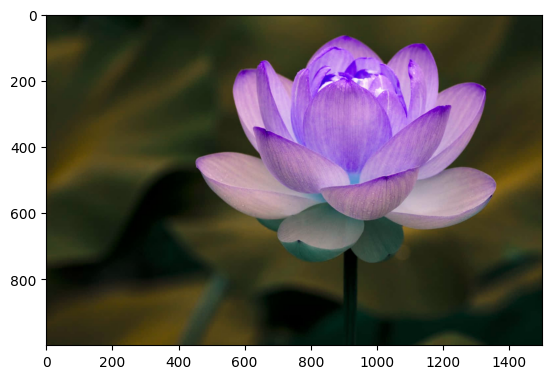

In [ ]:

# Task 3: Accessing a Specific Area in the Image

# Access and modify a specific pixel
pixel_value = img[50, 50]  # Get the BGR values at pixel (50, 50)
print(f'Pixel Value at (50, 50): {pixel_value}')

# Modify the pixel value (making it blue)
img[50, 50] = [255, 0, 0]  # BGR format: Blue, Green, Red
imshow(img)




Histogram:
A histogram is a graphical representation of the distribution of pixel intensity values in an image. It provides a visual summary of the pixel intensities, helping to understand the overall brightness and contrast characteristics of an image. In the context of digital images, the histogram shows the frequency of occurrence of each intensity level (from 0 to 255 in an 8-bit image) on the x-axis and the number of pixels with that intensity on the y-axis.

Key Concepts:
X-axis: Represents the pixel intensity values (0 to 255 for an 8-bit image).
Y-axis: Represents the frequency (number of pixels) of each intensity level.
Interpretation:
A peak in the histogram indicates a significant presence of pixels with that intensity.
The spread of the histogram indicates the overall contrast of the image.
A left-shifted histogram suggests darker regions, while a right-shifted

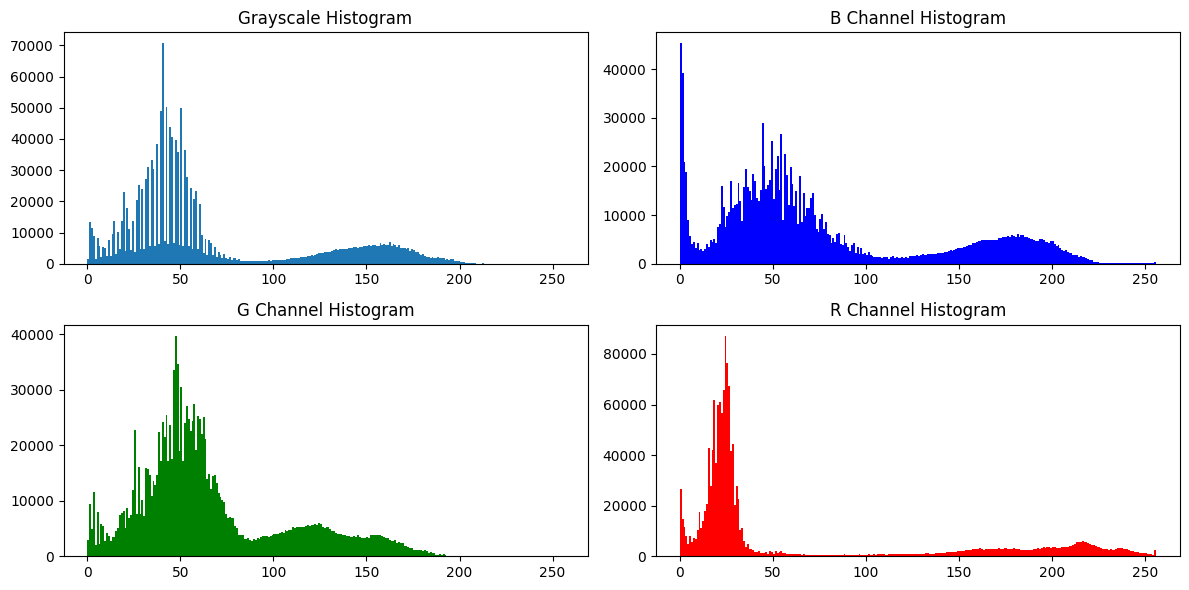

In [ ]:

# Task 4: Displaying Histograms for Various Images

# Read grayscale and color images
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Plot histograms
plt.figure(figsize=(12, 6))

# Plot grayscale histogram
plt.subplot(2, 2, 1)
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.title('Grayscale Histogram')

# Plot color histogram for Blue, Green, and Red channels
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    plt.subplot(2, 2, i + 2)
    plt.hist(img[:, :, i].ravel(), 256, [0, 256], color=color)
    plt.title(f'{color.upper()} Channel Histogram')

plt.tight_layout()
plt.show()


**5. Gray-scale Transformation:**

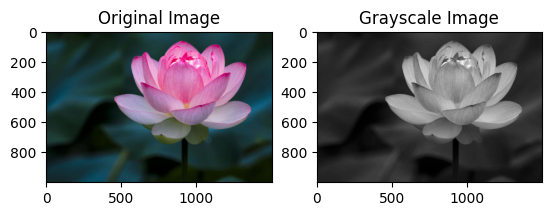

In [ ]:
# Load an image
img = cv2.imread('your_image.jpg')

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')

plt.show()


**6 Image Smoothing (Blurring):**

Image smoothing, also known as blurring, is a common image processing technique used to reduce noise, diminish sharp transitions between pixel intensities, and blur fine details. This process involves averaging or filtering pixel values over a neighborhood. One of the widely used methods for image smoothing is the Gaussian blur.

Gaussian Blur:
Gaussian blur is a type of image smoothing technique that uses a Gaussian function to compute the weighted average of pixel values in the neighborhood of each pixel. This results in a smoother and more visually pleasing image.

Key Concepts:
Kernel: A convolution kernel is used to calculate the weighted average. In the case of Gaussian blur, the kernel is a 2D matrix representing a Gaussian distribution.
Convolution: The kernel slides over the image, and for each pixel, the weighted average is calculated by multiplying corresponding kernel and image pixel values and summing them up.

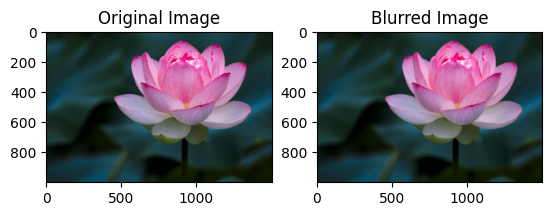

In [ ]:
# Apply Gaussian Blur
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Display the original and blurred images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')

plt.show()


**7. Connected Components in Images:**

Connected components analysis is a technique used in computer vision and image processing to identify and label connected regions in a binary image. A connected component is a set of pixels that are connected to each other and have the same value. This analysis is useful in various applications, including object recognition, image segmentation, and feature extraction.

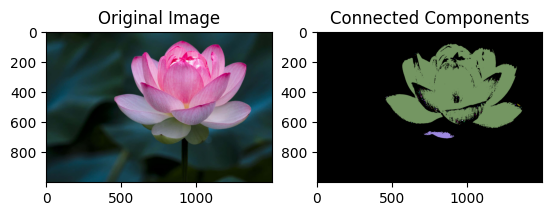

In [ ]:
# Threshold the image
ret, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Find connected components
_, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)

# Create an output image with different colors for each component
output_img = np.zeros_like(img)
for i in range(1, len(stats)):
    color = list(np.random.random(size=3) * 256)
    output_img[labels == i] = color

# Display the original and connected components images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title('Connected Components')

plt.show()


**8. Use Case: Sharpening, Blur, and Noise Removal using Filtering:**


Image filtering is a fundamental technique in image processing, and it can be used for various purposes such as sharpening, blurring, and noise removal. In this example, I'll cover sharpening using the Laplacian filter, blurring using a Gaussian filter, and noise removal using a median filter.


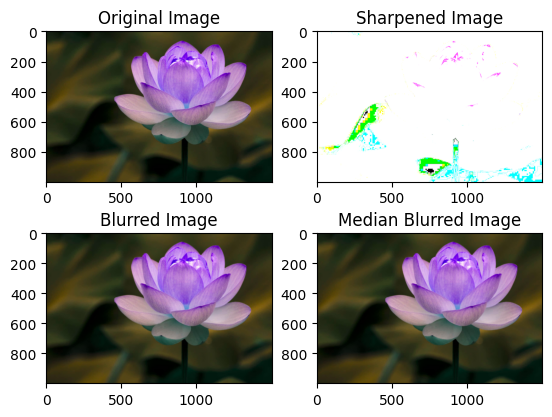

In [ ]:
# Sharpening using Laplacian filter
laplacian = cv2.Laplacian(img, cv2.CV_64F)
sharpened_img = img - 0.7 * laplacian

# Blur using a 5x5 kernel
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Noise removal using Median filter
median_blurred_img = cv2.medianBlur(img, 5)

# Display the original, sharpened, blurred, and median blurred images
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Sharpened Image')

plt.subplot(2, 2, 3)
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')

plt.subplot(2, 2, 4)
plt.imshow(median_blurred_img, cmap='gray')
plt.title('Median Blurred Image')

plt.show()
